# Problem Set - Applied Statistics

### Anna Sophia Maxen (dhv202)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy as scp
from iminuit import Minuit, cost
from IPython.core.display import Latex
import random
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [30]:
# General settings:
r = np.random                       # Random generator
r.seed(42)                          # Fixed order of random numbers

save_plots = True
verbose = True
N_verbose = 10



# MISSING FROM ALL PLOTS: TITLES

#### Problem 1

##### Problem 1.1

In [31]:
def prob(n):
    return (0.95)**n

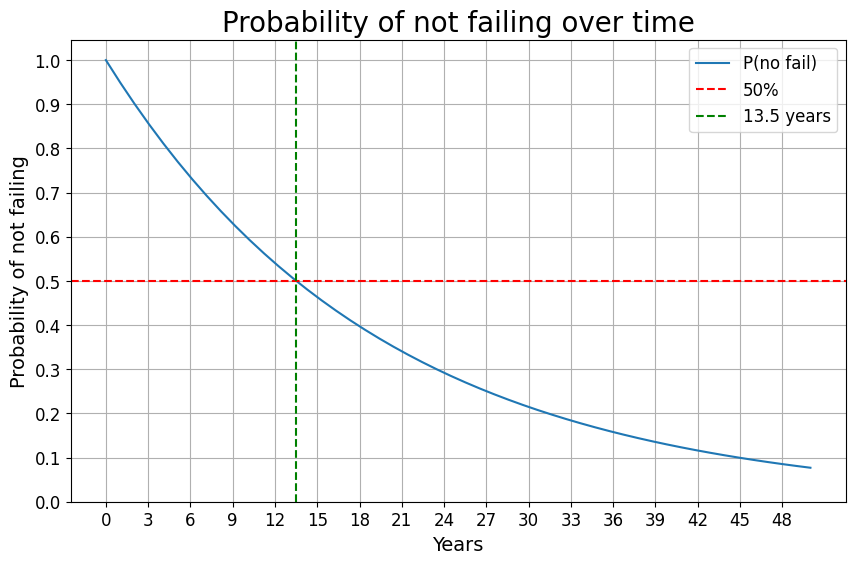

In [32]:
years = np.linspace(0, 50, 50)

p = prob(years)

plt.figure(figsize=(10, 6))
plt.plot(years, p, label='P(no fail)')  
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Probability of not failing', fontsize = 14)
plt.title('Probability of not failing over time', fontsize=20)
plt.grid()
plt.axhline(0.5, color='r', linestyle='--', label='50%')
plt.axvline(13.49, color='g', linestyle='--', label='13.5 years')
plt.legend(fontsize = 12)
plt.xticks(np.arange(0, 51, 3), fontsize = 12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize = 12)
if save_plots:
        plt.savefig('P(no_fail).png', dpi=600)
plt.show()

##### Problem 1.2

In [33]:
#defining the constant values
N = 365
l = 52.8
std = np.sqrt(l)

print(l + std)

60.06636084983398


In [34]:
def func_poisson_pmf(x, lamb):
    return scp.stats.poisson.pmf(x, lamb)

#survival function of a poisson distribution
def func_poisson_sf(x, lamb):
    return scp.stats.poisson.sf(x, lamb)

In [35]:


#a sigma is np.sqrt(lamb), but this constitutes 68% of the data. 
#We are interested in 80%, so that we can directly extract the  upper 20% of the data. 

desired_sigma = 30/np.sqrt(l)
#1 - 34.1
#x - 30

# figuring out which value from the distribution is the lower bound for the for the upper 20% of the distribution
threshold_value_busy_days = scp.stats.poisson.ppf(0.8, l)

# finding the survival function value at the threshold
sf_value_threshold = func_poisson_sf(threshold_value_busy_days, l)

print(f"Threshold value for upper 20%: {threshold_value_busy_days:.2f}")
print(f"Survival function value at threshold: {sf_value_threshold:.2f}")
# Calculate the corresponding number in the distribution with lambda = 52.8
corresponding_number = scp.stats.poisson.ppf(1 - sf_value_threshold, l)
#print(f"Corresponding number in the distribution: {corresponding_number}")

#Maximum customers:



#I do a cut-off at 3 sigma
upper_value_busy_days = scp.stats.poisson.ppf(0.999, l)
sf_value_upper = func_poisson_sf(upper_value_busy_days, l)
print(f"Upper value for 3 sigma: {upper_value_busy_days:.2f}")
print(f"Survival function value at upper value: {sf_value_upper:.3f}")


Threshold value for upper 20%: 59.00
Survival function value at threshold: 0.18
Upper value for 3 sigma: 77.00
Survival function value at upper value: 0.001


In [36]:
values = []
weights = []


#I want to calculate the average number of customers on a busy day
for i in range(int(upper_value_busy_days-threshold_value_busy_days)):
    values.append(i + threshold_value_busy_days)
    weights.append(func_poisson_pmf(i + threshold_value_busy_days, l))


mean_customers_busy = np.average(values, weights=weights)

print(f'The average number of customers on a busy day is: {mean_customers_busy:.2f}')


The average number of customers on a busy day is: 62.80


#### Problem 2

##### Problem 2.1

In [37]:
def weighted_mean(vals,sigs):
    values = np.array(vals)
    uncertainties = np.array(sigs)

    # Check if lengths match
    if len(values) != len(uncertainties):
        raise ValueError("Values and uncertainties must have the same length.")
    # Check for zero uncertainties to avoid division errors
    if np.any(uncertainties <= 0):
        raise ValueError("Uncertainties must be positive and non-zero.")

    # Calculate the weights
    weights = 1 / (uncertainties ** 2)
    # Calculate the weighted mean
    weighted_mean = np.sum(weights * values) / np.sum(weights)
    # Calculate the uncertainty of the weighted mean
    mean_uncertainty = np.sqrt(1 / np.sum(weights))
    
    
    return weighted_mean, mean_uncertainty

In [38]:
# Measurements in water

speed_of_sound = np.array([1532, 1458, 1499, 1394, 1432, 1565, 1474, 1440, 1507])
errors = np.array([67, 55, 74, 129, 84, 19, 10, 17, 14])

# Theoretical value
sos = 1481


In [39]:
#Naive average

naive_average_sos = np.mean(speed_of_sound)
naive_std_sos = np.sum(errors**2)/len(errors)

print(f'Naive: arithmetic mean and sum of quadrature of errors divided by number of errors: {naive_average_sos:.0f} +- {np.sqrt(naive_std_sos):.0f}')


#little bit less naive average

less_naive_average_sos = np.mean(speed_of_sound)
less_naive_std_sos = np.std(speed_of_sound, ddof=1)

print(f'Less naive: arithmetic mean and std: {less_naive_average_sos:.0f} +- {less_naive_std_sos:.0f}')

#least naive average, weighted mean

weighted_mean_sos, weighted_mean_uncertainty = weighted_mean(speed_of_sound, errors)

print(f'Weighted mean and errors on the weighted mean: {weighted_mean_sos:.0f} +- {weighted_mean_uncertainty:.0f}')

####here YOU HAVE TO THINK ABOUT YOUR ROUNDING

Naive: arithmetic mean and sum of quadrature of errors divided by number of errors: 1478 +- 65
Less naive: arithmetic mean and std: 1478 +- 53
Weighted mean and errors on the weighted mean: 1488 +- 7


In [40]:
print(len(speed_of_sound[0:5]))

5


In [41]:
#doing it for the first five, then the last four measurements

weighted_mean_sos_first, weighted_mean_uncertainty_first = weighted_mean(speed_of_sound[0:5], errors[0:5])

print(f'Weighted mean first five: {weighted_mean_sos_first:.0f} +- {weighted_mean_uncertainty_first:.0f}')

weighted_mean_sos_last, weighted_mean_uncertainty_last = weighted_mean(speed_of_sound[5:], errors[5:])

print(f'Weighted mean last four: {weighted_mean_sos_last:.0f} +- {weighted_mean_uncertainty_last:.0f}')

#combined weighted mean
combination_first_last = np.array([weighted_mean_sos_first, weighted_mean_sos_last])

combination_errors = np.array([weighted_mean_uncertainty_first, weighted_mean_uncertainty_last])

weighted_mean_sos_combined, weighted_mean_uncertainty_combined = weighted_mean(combination_first_last, combination_errors)

print(f'Weighted mean combined: {weighted_mean_sos_combined:.2f} +- {weighted_mean_uncertainty_combined:.2f}')
print(f'Theoretical value: {sos}')
print(f'Precision of the first five measurements: {np.abs(sos - weighted_mean_sos_first):.2f}')
print(f'Precision of the last four measurements: {np.abs(sos - weighted_mean_sos_last):.2f}')
print(f'Precision of the combined measurements: {np.abs(sos - weighted_mean_sos_combined):.2f}')

Weighted mean first five: 1476 +- 33
Weighted mean last four: 1488 +- 7
Weighted mean combined: 1487.66 +- 6.70
Theoretical value: 1481
Precision of the first five measurements: 5.47
Precision of the last four measurements: 7.19
Precision of the combined measurements: 6.66


Precision-wise the first five measurements give a value closer to the theoretical value. They have a very lousy accuracy though, with an error from the weighted mean of $\pm 32.66$.

z-test value: 0.99
Chi-square value: 29.92
Number of degrees of freedom: 9
p-value: 0.00


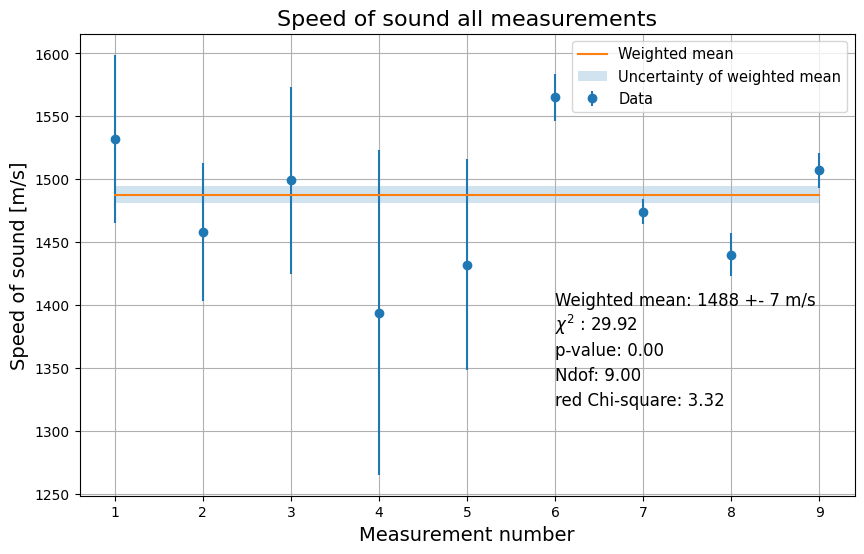

In [42]:
#doing a chi-square fit for the values,

# Define the model function
def z_test(v, mu, sigma):
    return np.abs(v - mu)/sigma


z_test_val = z_test(sos, weighted_mean_sos, weighted_mean_uncertainty)
print(f'z-test value: {z_test_val:.2f}')

def chi2(v, mu, sigma):
    return np.sum((v - mu)**2/sigma**2)

chi2_val = chi2(speed_of_sound, weighted_mean_sos, errors)
Ndof = len(speed_of_sound)
p_val = scp.stats.chi2.sf(chi2_val, Ndof)

chi2_val_first = chi2(speed_of_sound[0:5], weighted_mean_sos_first, errors[0:5])
Ndof_first = len(speed_of_sound[0:5])
p_val_first = scp.stats.chi2.sf(chi2_val_first, Ndof_first)

chi2_val_last = chi2(speed_of_sound[5:], weighted_mean_sos_last, errors[5:])
Ndof_last = len(speed_of_sound[5:])
p_val_last = scp.stats.chi2.sf(chi2_val_last, Ndof_last)

print(f'Chi-square value: {chi2_val:.2f}')
print(f'Number of degrees of freedom: {Ndof}')
print(f'p-value: {p_val:.2f}')

#plotting the fit

plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(1, 10), speed_of_sound, yerr=errors, fmt='o', label='Data')
plt.plot(np.arange(1, 10), np.ones(9)*weighted_mean_sos, label='Weighted mean')
plt.xlabel('Measurement number', fontsize=14)
plt.fill_between(np.arange(1, 10), np.ones(9)*(weighted_mean_sos - weighted_mean_uncertainty), np.ones(9)*(weighted_mean_sos + weighted_mean_uncertainty), alpha=0.2, label='Uncertainty of weighted mean')
plt.text(6, 1400, f'Weighted mean: {weighted_mean_sos:.0f} +- {weighted_mean_uncertainty:.0f} m/s', fontsize=12)
plt.text(6, 1380, f'$\chi^2$ : {chi2_val:.2f}', fontsize=12)
plt.text(6, 1360, f'p-value: {p_val:.2f}', fontsize=12)
plt.text(6, 1340, f'Ndof: {Ndof:.2f}', fontsize=12)
plt.text(6, 1320, f'red Chi-square: {chi2_val/Ndof:.2f}', fontsize=12)
plt.ylabel('Speed of sound [m/s]', fontsize=14)
plt.title('Speed of sound all measurements', fontsize=16)
plt.legend(loc = 'upper right', fontsize=10.5)
plt.grid()
if save_plots:
    plt.savefig('fit_speed_of_sound.png', dpi=600)
plt.show()

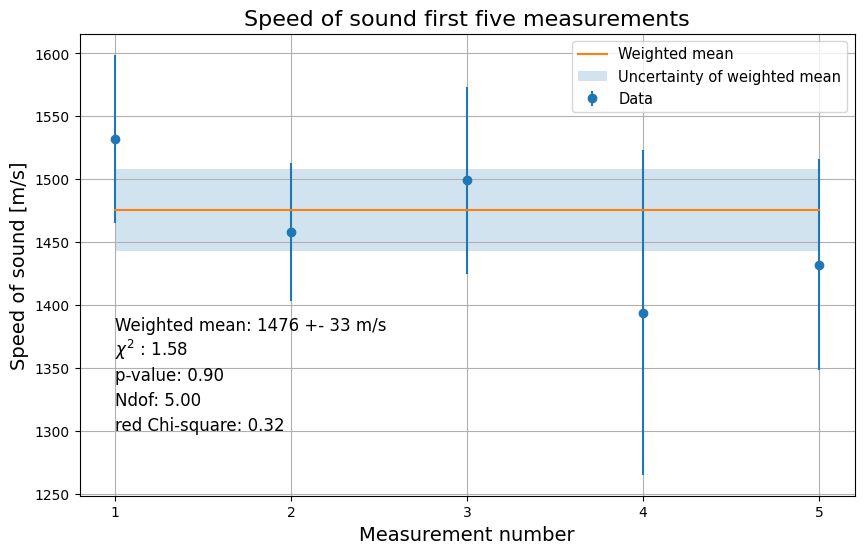

In [43]:

plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(1, 6), speed_of_sound[:5], yerr=errors[:5], fmt='o', label='Data')
plt.plot(np.arange(1, 6), np.ones(5)*weighted_mean_sos_first, label='Weighted mean')
plt.xlabel('Measurement number', fontsize=14)
plt.xticks(np.arange(1, 6))
plt.fill_between(np.arange(1, 6), np.ones(5)*(weighted_mean_sos_first - weighted_mean_uncertainty_first), np.ones(5)*(weighted_mean_sos_first + weighted_mean_uncertainty_first), alpha=0.2, label='Uncertainty of weighted mean')
plt.text(1, 1380, f'Weighted mean: {weighted_mean_sos_first:.0f} +- {weighted_mean_uncertainty_first:.0f} m/s', fontsize=12)
plt.text(1, 1360, f'$\chi^2$ : {chi2_val_first:.2f}', fontsize=12)
plt.text(1, 1340, f'p-value: {p_val_first:.2f}', fontsize=12)
plt.text(1, 1320, f'Ndof: {Ndof_first:.2f}', fontsize=12)
plt.text(1, 1300, f'red Chi-square: {chi2_val_first/Ndof_first:.2f}', fontsize=12)
plt.ylabel('Speed of sound [m/s]', fontsize=14)
plt.title('Speed of sound first five measurements', fontsize=16)
plt.legend(loc = 'upper right', fontsize=10.5)
plt.grid()
if save_plots:
    plt.savefig('fit_speed_of_sound_first.png', dpi=600)
plt.show()

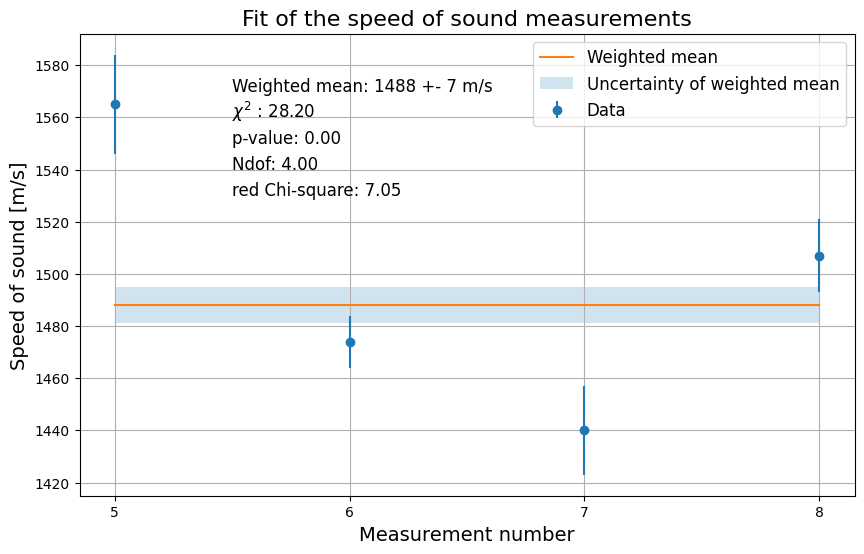

In [44]:
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(5, 9), speed_of_sound[5:], yerr=errors[5:], fmt='o', label='Data')
plt.plot(np.arange(5, 9), np.ones(4)*weighted_mean_sos_last, label='Weighted mean')
plt.xlabel('Measurement number', fontsize=14)
plt.xticks(np.arange(5,9))
plt.fill_between(np.arange(5, 9), np.ones(4)*(weighted_mean_sos_last - weighted_mean_uncertainty_last), np.ones(4)*(weighted_mean_sos_last + weighted_mean_uncertainty_last), alpha=0.2, label='Uncertainty of weighted mean')
plt.text(5.5, 1570, f'Weighted mean: {weighted_mean_sos_last:.0f} +- {weighted_mean_uncertainty_last:.0f} m/s', fontsize=12)
plt.text(5.5, 1560, f'$\chi^2$ : {chi2_val_last:.2f}', fontsize=12)
plt.text(5.5, 1550, f'p-value: {p_val_last:.2f}', fontsize=12)
plt.text(5.5, 1540, f'Ndof: {Ndof_last:.2f}', fontsize=12)
plt.text(5.5, 1530, f'red Chi-square: {chi2_val_last/Ndof_last:.2f}', fontsize=12)
plt.ylabel('Speed of sound [m/s]', fontsize=14)
plt.title('Fit of the speed of sound measurements', fontsize=16)
plt.legend(loc = 'upper right', fontsize=12)
plt.grid()
if save_plots:
    plt.savefig('fit_speed_of_sound_last.png', dpi=600)
plt.show()

Checking for consistency between the values:

In [45]:
mean,sig = weighted_mean(speed_of_sound, errors)
#Check for consistency

ind_max = 0
ind_min = 0
max_el = speed_of_sound[0]
min_el = speed_of_sound[0]

for i,v in enumerate(speed_of_sound):
    if v>max_el:
        max_el = v
        ind_max = i
    if v<min_el:
        min_el = v
        ind_min = i
        
max_val,max_sig = [max_el,errors[ind_max]]
min_val,min_sig = [min_el,errors[ind_min]]

if max_val-max_sig*2 < min_val+min_sig*2:
    sig = sig
else: 
    sig = np.std(speed_of_sound, ddof=1)
    print(f'Measurements inconsistent for {sos}. Using standard deviation of measurements as error on the mean')



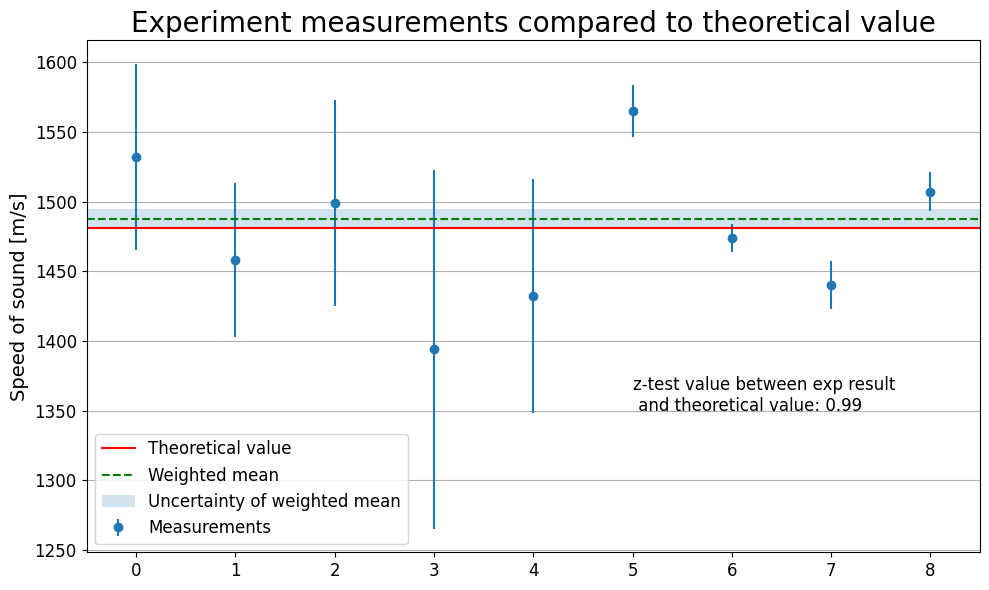

In [46]:
#check for consistency between the measurements
n = range(len(speed_of_sound))
x = np.linspace(1481, 1481, 9) 
n0 = np.arange(-1,10)

plt.figure(figsize=(10, 6))
plt.title('Experiment measurements compared to theoretical value', fontsize=20)
plt.errorbar(n, speed_of_sound, yerr=errors, fmt='o', label='Measurements')
plt.ylabel('Speed of sound [m/s]', fontsize=14)
plt.axhline(sos, label='Theoretical value', color='r')
plt.axhline(weighted_mean_sos, color='g', linestyle='--', label='Weighted mean')
plt.fill_between(n0, weighted_mean_sos - sig, weighted_mean_sos + sig, alpha=0.2, label='Uncertainty of weighted mean')
plt.legend(loc='lower left',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y')
plt.yticks(fontsize=12)
plt.text(5, 1350, 'z-test value between exp result \n and theoretical value: {:.2f}'.format(z_test_val), fontsize=12)
plt.xlim(-0.5,8.5)
plt.tight_layout()
plt.savefig('sos_theo.png', dpi=600)
plt.show()

In [47]:
#Chauvenet's criterion, except it doesn't work for so few data points. Maybe I would take some of the points away more manually.

#new_sos = Chauvenets(speed_of_sound)


##### Problem 2.2

In [48]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

def error_prop_general(f, vars, dvars, **kwargs):
    """General error propagation for a function of two variables
    
    Parameters
    ----------
    f : function
        The function to calculate the error for
    x : float
        The value of the first variable
    dx : float
        The error on the first variable
    y : float
        The value of the second variable
    dy : float
        The error on the second variable
    kwargs : dict
        Additional keyword arguments for the function
        
    Returns
    -------
    float
        The error on the function
    """
    # Calculate the derivatives with respect to each variable
    dfs = []

    for i in range(len(vars)):
        dfs.append(diff(f, vars[i]))
    
    # Calculate the error
    error = sqrt(([dfs[i] + dvars[i] for i in range(len(dfs))])**2)
    
    return error

In [49]:
#Defining the variables

mu_A = 1.01
sigma_A = 0.19
mu_gamma = 0.12
sigma_gamma = 0.05
mu_omega = 0.47
sigma_omega = 0.06
t = 1



In [50]:

#Doing latex magic
A, gamma, omega, time = symbols("A, gamma, omega, t")
dA, dgamma, domega, dtime = symbols("sigma_A, sigma_gamma, sigma_omega, sigma_t")
dx_A,dx_gamma,dx_omega = symbols("sigma_x^A,sigma_x^gamme,sigma_x^omega")
    
# Define relation, and print:
x_af_t = A * exp(-time * gamma) * cos(omega * time)
lprint(latex(Eq(symbols('x_af_t'),x_af_t)))
    
# Calculate uncertainty and print:
dx_af_t = sqrt(x_af_t.diff(A)**2 * dA**2 + x_af_t.diff(gamma)**2 * dgamma**2 + x_af_t.diff(omega)**2 * domega**2)
dx_A = sqrt(x_af_t.diff(A)**2 * dA**2)
dx_gamma = sqrt(x_af_t.diff(gamma)**2 * dgamma**2)
dx_omega = sqrt(x_af_t.diff(omega)**2 * domega**2)

lprint(latex(Eq(symbols('sigma_x_(t)'), dx_af_t)))
lprint(latex(Eq(symbols('sigma_x^A'), dx_A)))
lprint(latex(Eq(symbols('sigma_x^gamma'), dx_gamma)))
lprint(latex(Eq(symbols('sigma_x^omega'), dx_omega)))
    
# Turn expression into numerical functions 
fx_af_t = lambdify((A, gamma, omega, time),x_af_t)
fdx_af_t = lambdify((A,dA,gamma, dgamma, omega, domega, time, dtime),dx_af_t)
    
# Define values and their errors
vA, vdA = mu_A, sigma_A
vgamma, vdgamma = mu_gamma, sigma_gamma
vomega, vdomega = mu_omega, sigma_omega
vt, vdt = t, 0

    
# Numerically evaluate expressions and print 
vx_af_t = fx_af_t(vA, vgamma, vomega, vt)
vdx_af_t = fdx_af_t(vA, vdA, vgamma, vgamma, vomega, vdomega, vt, vdt)
lprint(fr'x(t) = ({vx_af_t:.4f} \pm {vdx_af_t:.4f})')
lprint(fr'A = ({vA:.4f} \pm {vdA:.4f})')
lprint(fr'gamma = ({vgamma:.4f} \pm {vdgamma:.4f})')
lprint(fr'omega = ({vomega:.4f} \pm {vdomega:.4f})')




<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [70]:

print(f'The value of the function at t=1 is: {vx_af_t:.2f} +- {vdx_af_t:.2f}')

#Antoher way to do it is to use the sympy error propagation function.

# Define the function

x_af_t = A * exp(-time * gamma) * cos(omega * time)

x = mu_A * np.exp(-t * mu_gamma) * np.cos(mu_omega * t)

# Define the variables

sig_ny_x_af_t = x * np.sqrt((sigma_A/mu_A)**2 + 0.1*(sigma_gamma/mu_gamma)**2 + 0.1*(sigma_omega/mu_omega)**2)

print(f'try 1: {vx_af_t:.2f} +- {sig_ny_x_af_t:.2f}')



The value of the function at t=1 is: 0.80 +- 0.18
try 1: 0.80 +- 0.19


In [331]:

mu_A = 1.01
sigma_A = 0.19
mu_gamma = 0.12
sigma_gamma = 0.05
mu_omega = 0.47
sigma_omega = 0.06
t = 1

times = np.linspace(0, 30, 100)

A_s = np.zeros(len(times))
gamma_s = np.zeros(len(times))
omega_s = np.zeros(len(times))

for i in range(len(times)):
    A_s[i] = dx_A.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i]})
    gamma_s[i] = dx_gamma.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i]})
    omega_s[i] = dx_omega.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i]})

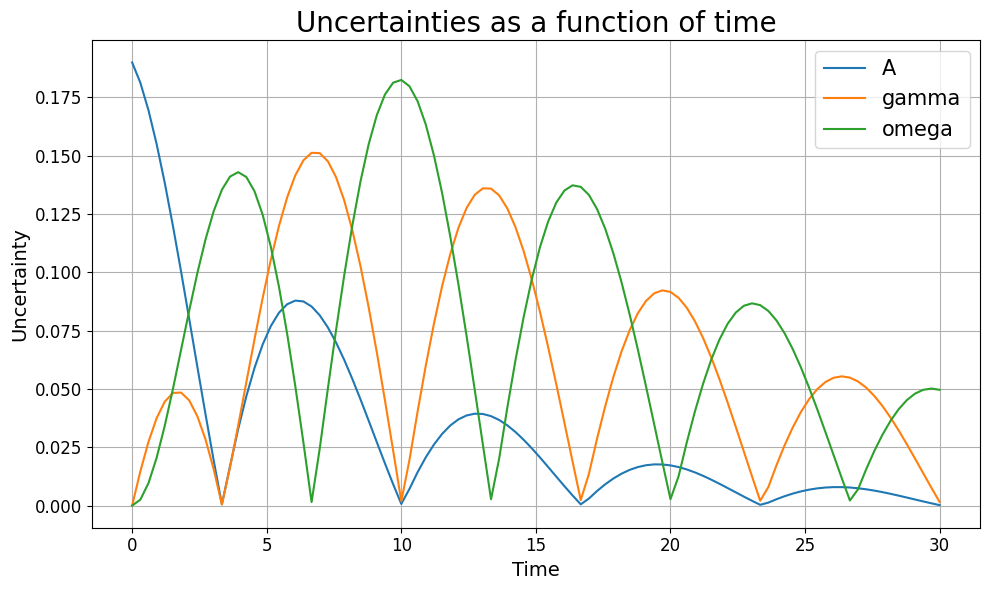

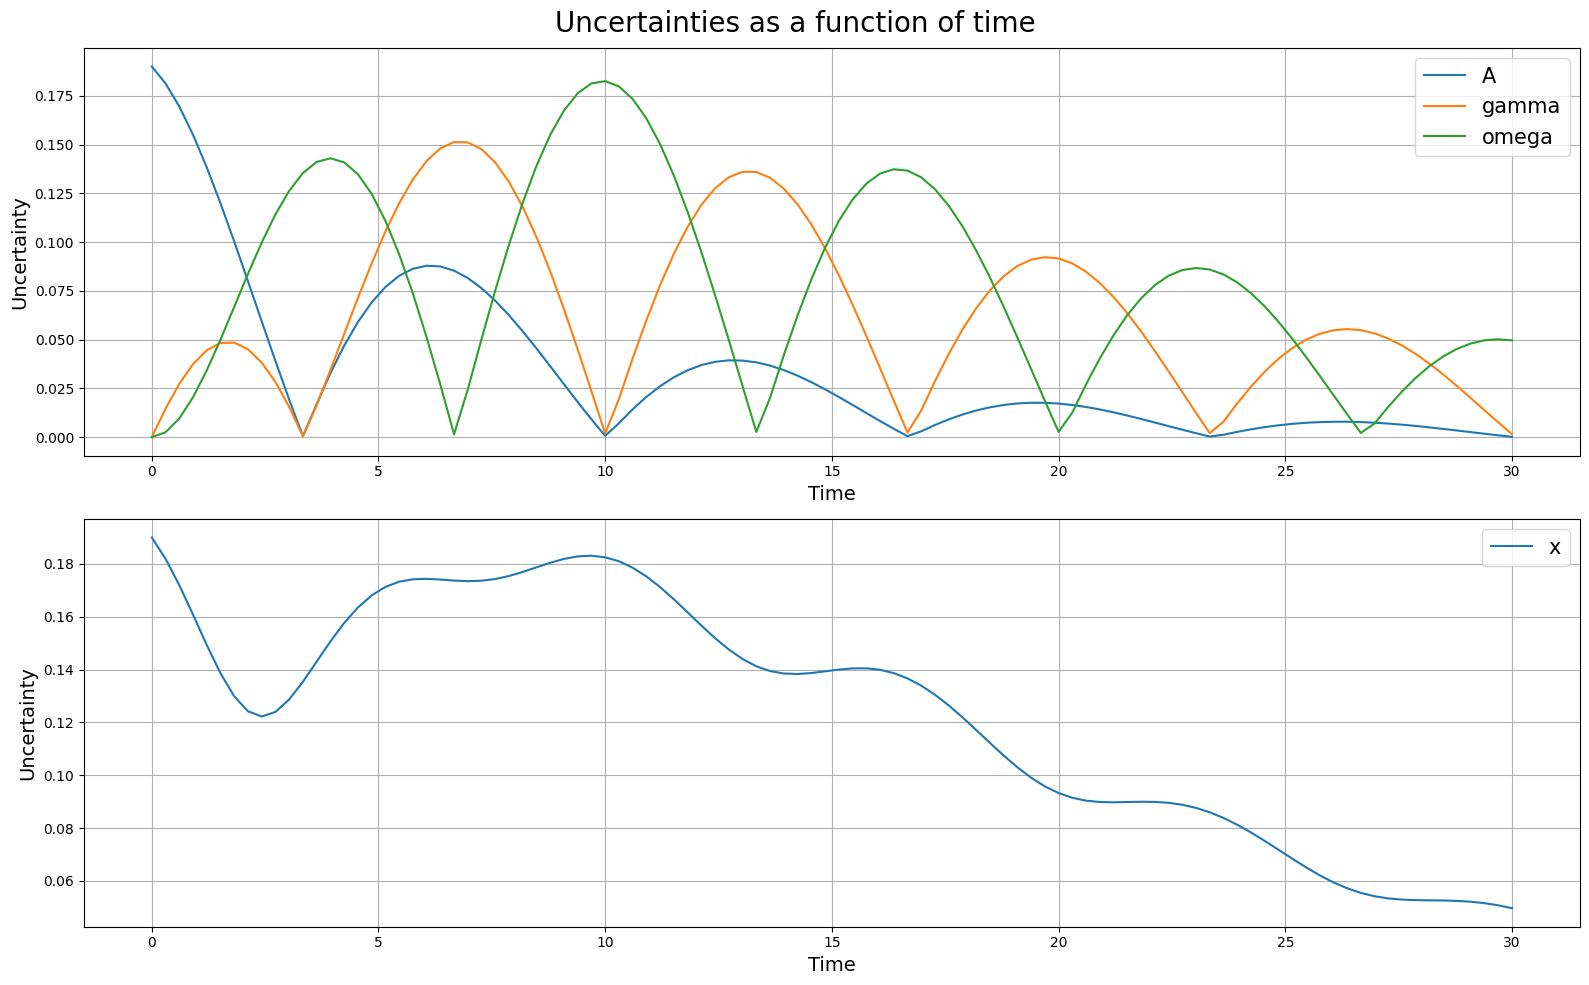

In [332]:
#now we want to plot the different uncertainties as a function of time

plt.figure(figsize=(10, 6))
plt.title('Uncertainties as a function of time', fontsize=20)
plt.plot(times, A_s, label='A')
plt.plot(times, gamma_s, label='gamma')
plt.plot(times, omega_s, label='omega')
plt.legend(fontsize=15)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Uncertainty', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

#now doing a subplot with uncertainty of x as well

x_s = np.zeros(len(times))

for i in range(len(times)):
    x_s[i] = dx_af_t.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i], dtime: 0})

fig, ax = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Uncertainties as a function of time', fontsize=20)
ax[0].plot(times, A_s, label='A')
ax[0].plot(times, gamma_s, label='gamma')
ax[0].plot(times, omega_s, label='omega')
ax[0].legend(fontsize=15)
ax[0].set_xlabel('Time', fontsize=14)
ax[0].set_ylabel('Uncertainty', fontsize=14)
ax[0].grid()

ax[1].plot(times, x_s, label='x')
ax[1].set_xlabel('Time', fontsize=14)
ax[1].set_ylabel('Uncertainty', fontsize=14)
ax[1].grid()
ax[1].legend(fontsize=15)
plt.tight_layout()
plt.savefig('uncertainties.png', dpi=600)
plt.show()


#### Problem 3

##### Problem 3.1

In [333]:
def probability_of_scoring(aim):
    if np.abs(aim) < 4:
        p = np.abs(aim)/4
    elif np.abs(aim) >= 4:
        p = 0
    return p

print(f'The probability of scoring a goal is: {probability_of_scoring(2.5):.2f}')

The probability of scoring a goal is: 0.62


In [334]:
border = 4

def pdf_of_shot(aim, border):
    return (scp.stats.norm.cdf(border, aim, 1) - scp.stats.norm.cdf(-border, aim, 1))*probability_of_scoring(aim)

In [335]:
p = pdf_of_shot(2.5, border)
print(f'{p:.2f}')

0.58


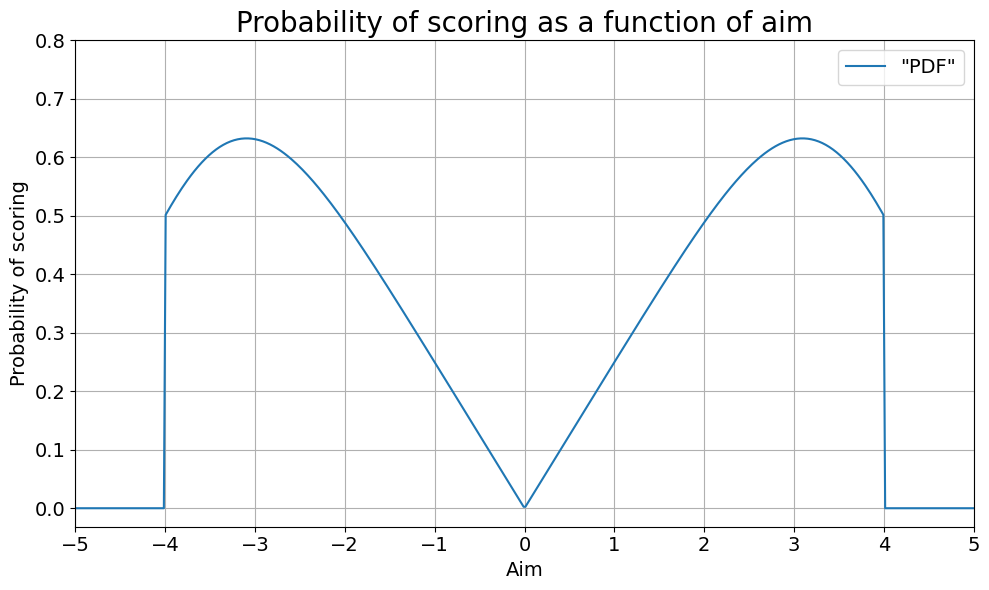

In [336]:
#plotting the custom probability density function

aim = np.linspace(-10, 10, 1000)

plt.figure(figsize=(10, 6))
plt.plot(aim, [pdf_of_shot(i, border) for x,i in enumerate(aim)], label = '"PDF"')
plt.title('Probability of scoring as a function of aim', fontsize=20)
plt.xlabel('Aim', fontsize=14)
plt.ylabel('Probability of scoring', fontsize=14)
plt.xlim(-5, 5)
plt.xticks(np.arange(-5, 6, 1), fontsize=14)
plt.yticks(np.arange(0, 0.85, 0.1), fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('pdf_of_shot.png', dpi=600)
plt.show()

In [337]:
#Finding the maximum of the function

max_aim = scp.optimize.minimize(lambda x: -pdf_of_shot(x, border), 0).x

print(f'The aim with maximum probability of scoring is: +- {max_aim[0]:.2f}')
print(f'The probability of scoring a goal with this aim is: {pdf_of_shot(max_aim[0], border):.2f}')

The aim with maximum probability of scoring is: +- 3.09
The probability of scoring a goal with this aim is: 0.63


##### Problem 3.2

Detertmining the normalization constant of our pdf

In [338]:
#getting the normalization constant from monte carlo simulation
def func_pdf_unnormalized(x):
    return (np.arctan(x)) + (np.pi/2)

N = 100000

xmin = -3.0 
xmax = 3.0  

xs = np.linspace(xmin, xmax, N)
ys = np.array([func_pdf_unnormalized(x) for x in xs])

x_box = np.random.uniform(xmin, xmax, N)
y_box = np.random.uniform(np.min(ys), np.max(ys), N)

x_accept = []
y_accept = []

N_try = 0

for i in range(N):

    if y_box[i] < func_pdf_unnormalized(x_box[i]):
        N_try += 1
        x_accept.append(x_box[i])
        y_accept.append(y_box[i])

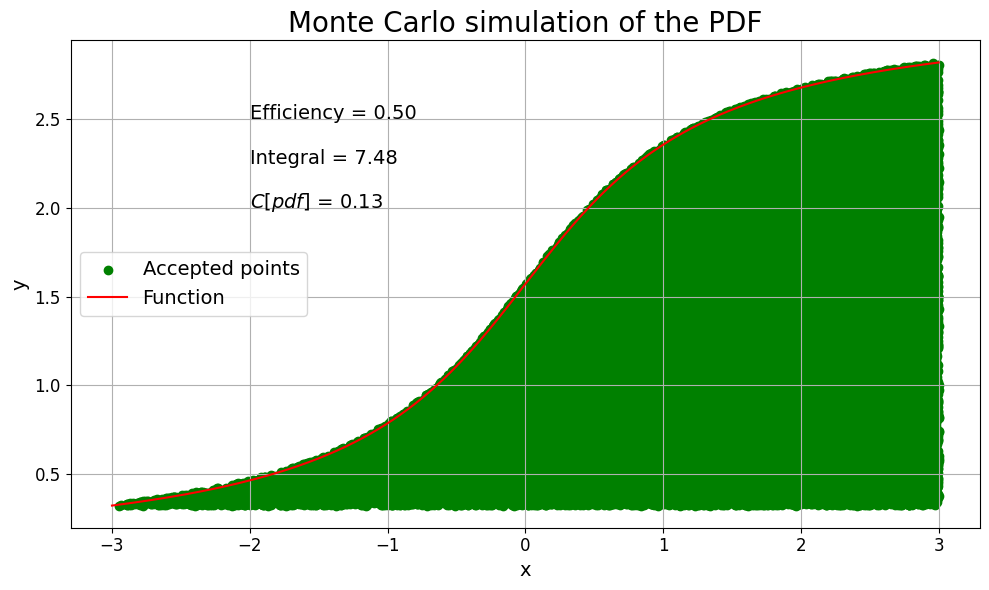

In [339]:
#Plotting the function and the accepted points
eff = N_try / N                         

# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N) 

# Integral
integral =  eff * (xmax-xmin) * (np.max(ys) - np.min(ys))

# Error on integral
eintegral = eff_error * (xmax-xmin) * (np.max(ys) - np.min(ys))  

Cpdf_from_mc = 1/integral

plt.figure(figsize=(10, 6))
plt.scatter(x_accept, y_accept, color='g', label='Accepted points')
plt.plot(xs, ys, color = 'red', label='Function')
plt.text(-2, 2.5, 'Efficiency = {:.2f}'.format(eff), fontsize=14)
plt.text(-2, 2.25, 'Integral = {:.2f}'.format(integral), fontsize=14)
plt.text(-2, 2, '$C [pdf]$ = {:.2f}'.format(Cpdf_from_mc), fontsize=14)
plt.title('Monte Carlo simulation of the PDF', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('monte_carlo_pdf.png', dpi=600)
plt.show()

In [340]:
#Getting the normalization constant
# Efficiency
eff = N_try / N                         

# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N) 

# Integral
integral =  eff * (xmax-xmin) * (np.max(ys) - np.min(ys))

# Error on integral
eintegral = eff_error * (xmax-xmin) * (np.max(ys) - np.min(ys))  

print(eff, integral)

0.49928 7.483482878916006


The normalization constant will ensure that our pdf has an area of 1, so it will be 1/integral

In [341]:
Cpdf_from_mc = 1/integral
print(f'The normalization constant from Monte Carlo simulation is: {Cpdf_from_mc:.2f}')

The normalization constant from Monte Carlo simulation is: 0.13


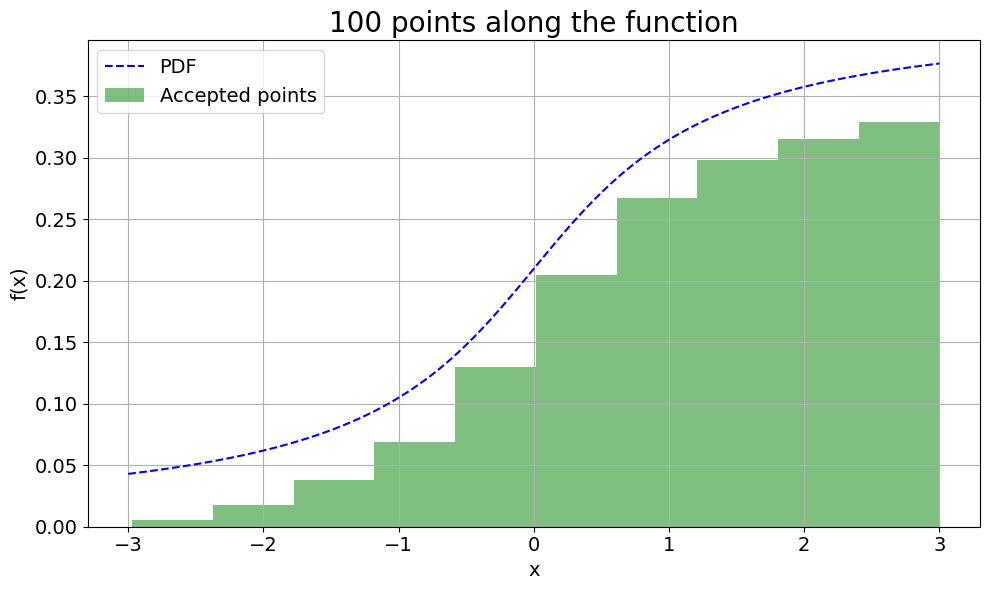

In [342]:
#producing 100 points along the function
def func_pdf(x, C):
    return C*((np.arctan(x)) + (np.pi/2))

N_func = 100

x_func = np.linspace(xmin, xmax, N_func)
y_func = np.array([func_pdf(x, Cpdf_from_mc) for x in x_func])

x_box = np.random.uniform(xmin, xmax, N)
y_box = np.random.uniform(np.min(ys), np.max(ys), N)

x_accept = []
y_accept = []

N_try = 0

for i in range(N):

    if y_box[i] < func_pdf_unnormalized(x_box[i]):
        N_try += 1
        x_accept.append(x_box[i])
        y_accept.append(y_box[i])

#plotting the points

plt.figure(figsize=(10, 6))
plt.plot(x_func, y_func, color='blue', label='PDF', linestyle='--')
plt.hist(x_accept, bins=10, density=True, color='g', alpha=0.5, label='Accepted points')
plt.title('100 points along the function', fontsize=20)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('100_points.png', dpi=600)
plt.show()


Having these data points, I will fit the function to them with a least sq. fit, and get minuit to extract the parameter C, which I can then compare to the Cpdf from Monte Carlo simulation. To do a least squares fit, I will have to estimate errors on the data points I just created. As a basic assumption, I will assign them Gaussian errors, with a small std. I don't assume there is a lot of error in these. 

In [343]:
#creating the gaussian errors for the points
counts, bins = np.histogram(x_accept, bins=10)

x = (bins[1:][counts>0] + bins[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])

#Fit the data

exp_fit = cost.LeastSquares(x, y, sy, func_pdf)
mfit = Minuit(exp_fit, C = Cpdf_from_mc)
mfit.migrad()

##FÅ FITTET TIL Å FUNKE

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7389 (χ²/ndof = 821.0)     │              Nfcn = 18               │
│ EDM = 7.34e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ C    │  2.703e3  │  0.013e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────┐
│   │   C │
├───┼─────┤
│ C │ 171 │
└───┴─────┘

In [344]:
c_fit = mfit.values[0]
c_fit_error = mfit.errors[0]

print(f'The normalization constant from the fit is: {c_fit:.2f} +- {c_fit_error:.2f}')

The normalization constant from the fit is: 2703.20 +- 13.09


In [345]:
###Get them to the decimal place where they differ and compare.

#### Problem 4

##### Problem 4.1

In [346]:
#reading the data file 

dataframe = pd.read_csv('data_LargestPopulation.csv', header=0)
Year, PopIndia, PopChina = dataframe.values.T

desired_year_range_df = dataframe[3:14]

desired_year_range_df

,Year,PopIndia,PopChina
3,1963,477933630,683903550
4,1964,489059300,704593800
5,1965,500114340,723846340
6,1966,510992600,742948540
7,1967,521987070,761006300
8,1968,533431900,780372000
9,1969,545314700,801431000
10,1970,557501300,822534460
11,1971,569999170,843285440
12,1972,582837950,862840400


In [347]:
#for i in range(10):
#    print(f"  Year: {int(Year[i]):4d}   PopIndia{PopIndia[i]:9.0f}   PopChina = {PopChina[i]:9.0f}")

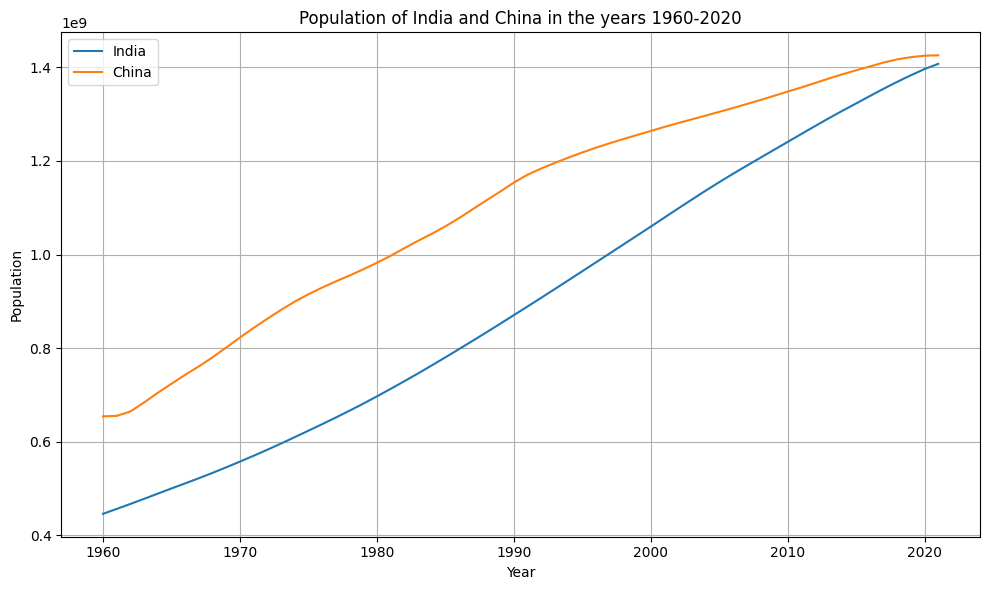

In [348]:
#plotting the data 

plt.figure(figsize=(10, 6))
plt.plot(Year, PopIndia, label='India')
plt.plot(Year, PopChina, label='China')
plt.title('Population of India and China in the years 1960-2020')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),)


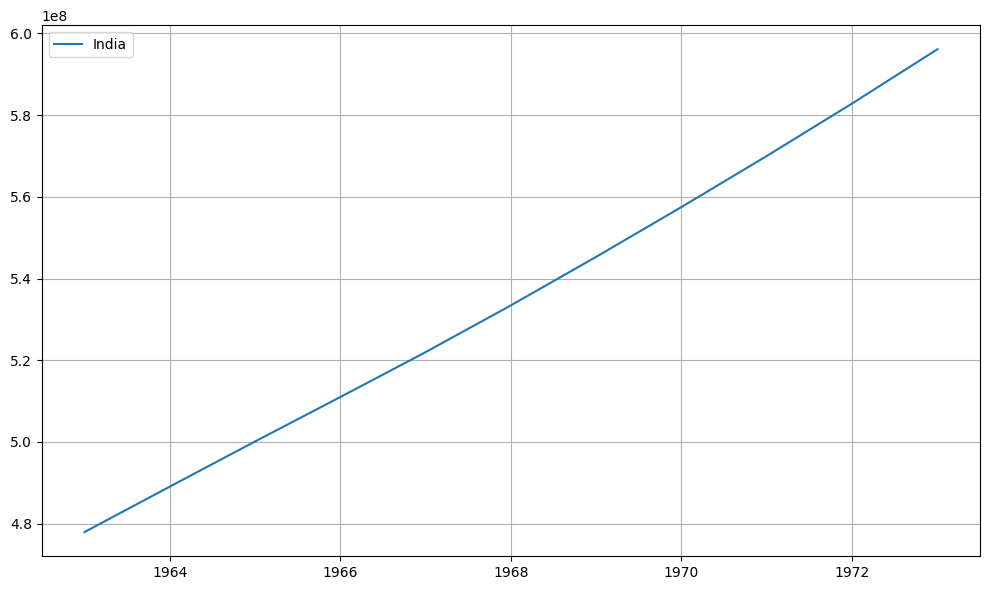

In [349]:
#Plotting the data from years 1963-1973

desired_year_range = np.where((Year >= 1963) & (Year <= 1973))
print(desired_year_range)

plt.figure(figsize=(10, 6))
plt.plot(Year[desired_year_range], PopIndia[desired_year_range], label='India')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7685.
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           1.66e-14
Time:                        19:06:32   Log-Likelihood:                 8.8577
No. Observations:                  11   AIC:                            -13.72
Df Residuals:                       9   BIC:                            -12.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1922.5010      0.520  

/Users/annasophiamaxen/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


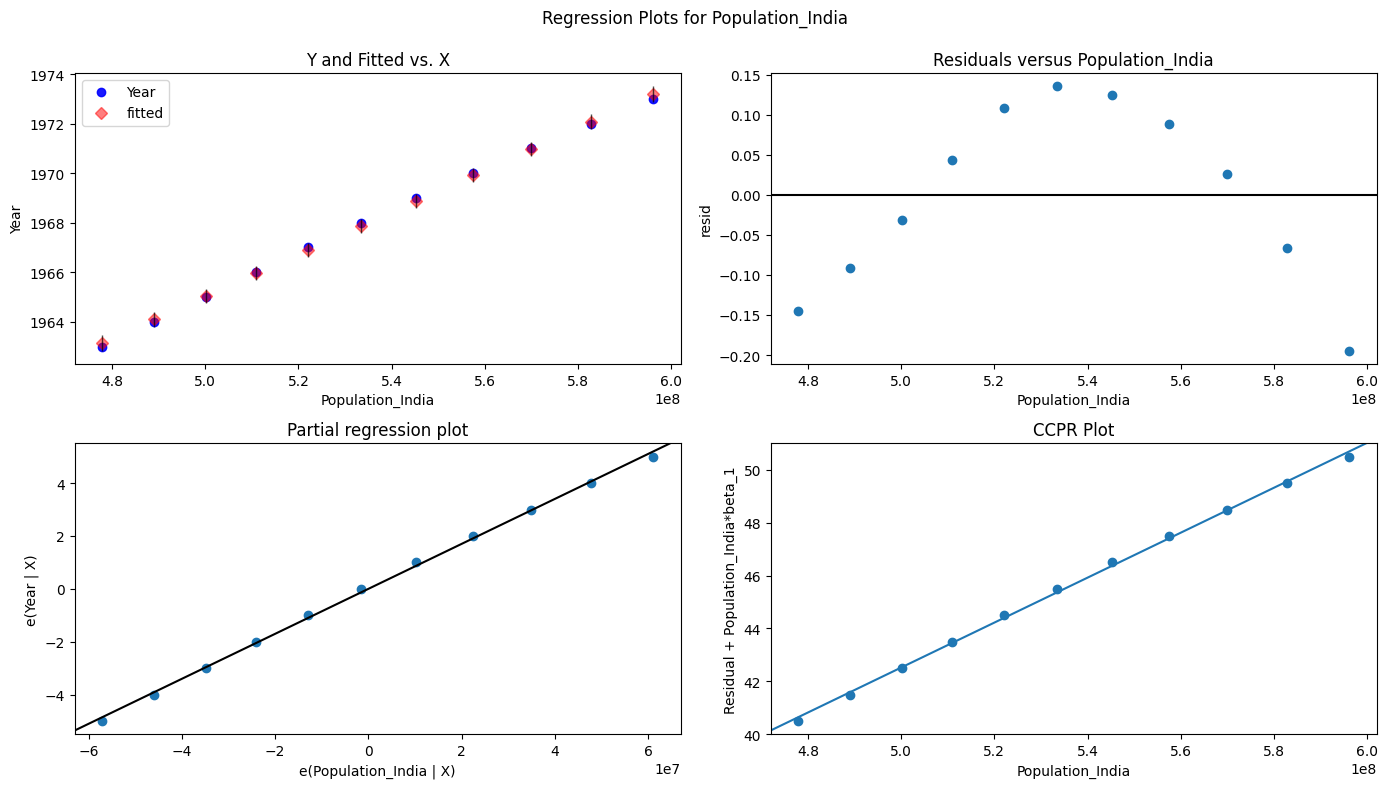

In [350]:
#Fitting the data for india in the desired year range linearly

def linear(x, a, b):
    return a*x + b

#I assume the error is the square root of the population since these must be poisson distributed.
#Each of them is a count of people, which is a poisson distribution with lambda = population.

Population_India = PopIndia[3:14]
# fit simple linear regression model 
linear_model = ols('Year ~ Population_India', 
                   data=desired_year_range_df).fit() 
  
# display model summary 
print(linear_model.summary()) 
  
# modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(linear_model, 
                                    'Population_India', fig=fig)

In [351]:
#doing it also with a least squares fit

# Fit the data
linear_fit_india = cost.LeastSquares(Year[desired_year_range], PopIndia[desired_year_range], np.sqrt(PopIndia[desired_year_range]), linear)

mfit = Minuit(linear_fit_india, a = 1, b = 1)
mfit.migrad()
Ndof = len(Year[desired_year_range])-2
chi2_val = mfit.fval
red_chi2 = chi2_val/Ndof
p_val = scp.stats.chi2.sf(mfit.fval, len(Year[desired_year_range])-2)


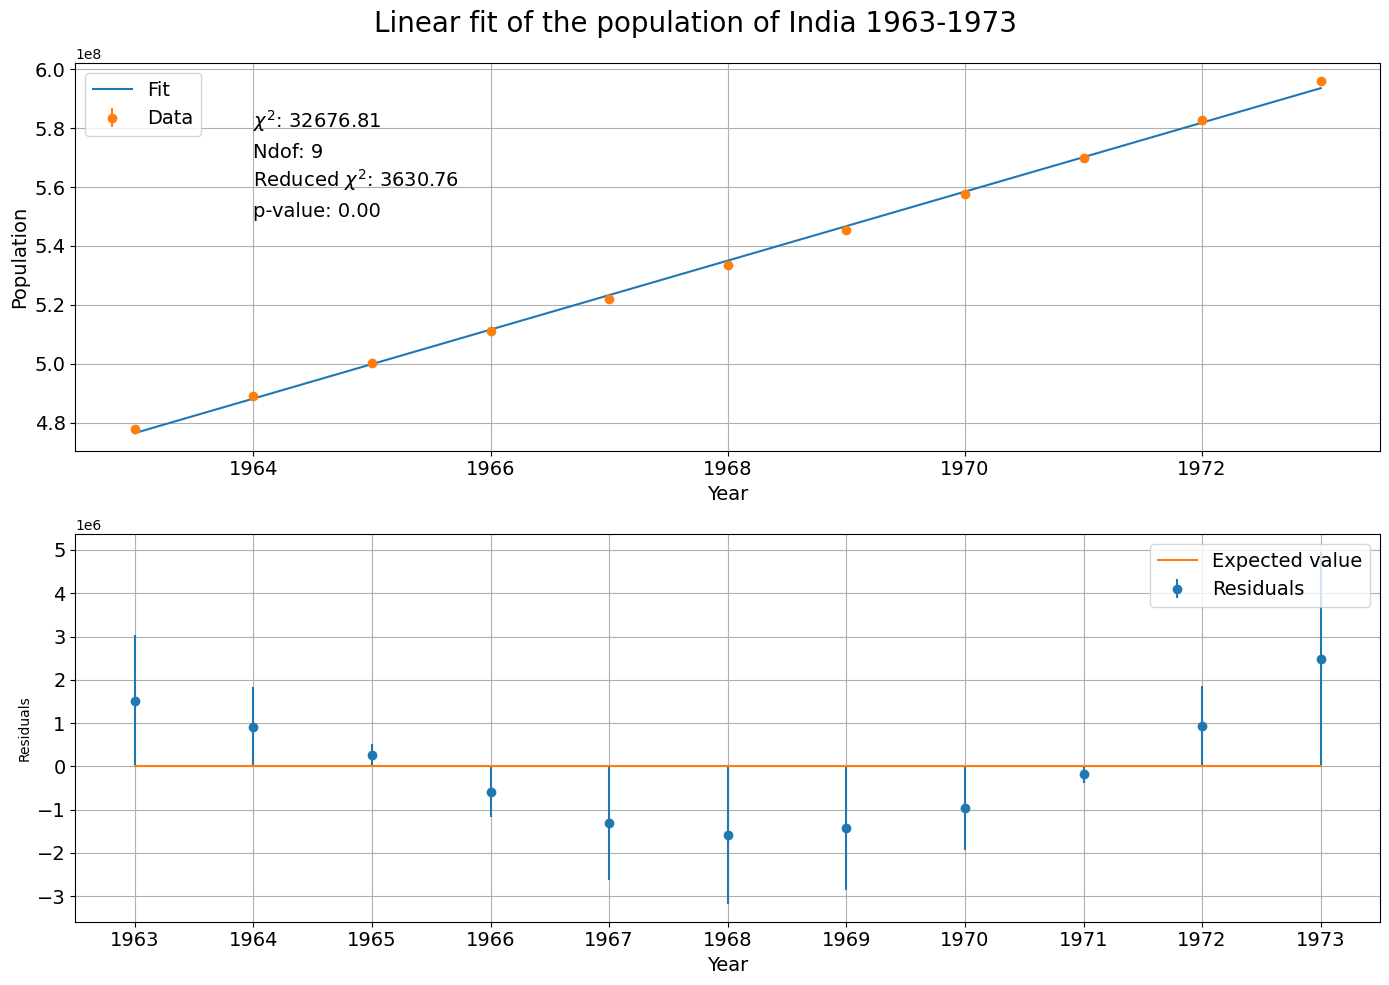

In [352]:
#manually calculating the residuals

residuals = PopIndia[desired_year_range] - linear(Year[desired_year_range], mfit.values[0], mfit.values[1])

errs = np.abs(residuals)
#plotting the residuals
fig, ax = plt.subplots(2,1, figsize=(14, 10))
fig.suptitle('Linear fit of the population of India 1963-1973', fontsize=20)
#plotting the fit
ax[0].plot(Year[desired_year_range], linear(Year[desired_year_range], mfit.values[0], mfit.values[1]), label='Fit')
ax[0].errorbar(Year[desired_year_range], PopIndia[desired_year_range], yerr=np.sqrt(PopIndia[desired_year_range]), label='Data', fmt='o')
ax[0].set_xlabel('Year', fontsize=14)
ax[0].set_ylabel('Population', fontsize = 14)
ax[0].text(1964, 5.8e8, f'$\chi^2$: {chi2_val:.2f}', fontsize=14)
ax[0].text(1964, 5.7e8, f'Ndof: {Ndof}', fontsize=14)
ax[0].text(1964, 5.6e8, f'Reduced $\chi^2$: {red_chi2:.2f}', fontsize=14)
ax[0].text(1964, 5.5e8, f'p-value: {p_val:.2f}', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].grid()
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].errorbar(Year[desired_year_range], residuals, yerr=errs, label='Residuals', fmt='o')
ax[1].set_xlabel('Year', fontsize = 14)
#plotting the expected value of the residuals
ax[1].plot(Year[desired_year_range], np.zeros(len(Year[desired_year_range])), label='Expected value')
ax[1].set_xticks(np.arange(1963, 1974, 1))
ax[1].set_ylabel('Residuals')
ax[1].legend(fontsize=14)
ax[1].grid()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('linear_fit_india.png', dpi=600)
plt.show()

In [353]:
cig = np.mean(errs)

print(cig)

1106854.2307489568


Assuming an uncertainty of +- 1000000, model both populations and estimate when the indian population becomes larger then the chinese.

In [425]:
Years = np.linspace(1, 20, 20)
assumed_uncert = np.ones(len(Years))*10**6


# Fitting the data for the entire year range

fit_india = cost.LeastSquares(Years, PopIndia[-20:], assumed_uncert, linear)
fit_chinese = cost.LeastSquares(Years, PopChina[-20:], assumed_uncert, linear)

mfit_india = Minuit(fit_india, a = 4, b = 1000)
mfit_china = Minuit(fit_chinese, a = 1, b = 1)

mfit_india.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 350.1 (χ²/ndof = 19.5)     │              Nfcn = 45               │
│ EDM = 3.11e-13 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  16.43e6  │  0.04e6   │            │            │         │         │       │
│ 1 │ b    │ 1.0896e9  │ 0.0005e9  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  1.5e+09  -15.8e9 │
│ b │  -15.8e9 2.16e+11 │
└───┴───────────────────┘

In [426]:
mfit_china.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 317 (χ²/ndof = 17.6)       │              Nfcn = 71               │
│ EDM = 6.25e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  8.24e6   │  0.04e6   │            │            │         │         │       │
│ 1 │ b    │ 1.2737e9  │ 0.0005e9  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  1.5e+09  -15.8e9 │
│ b │  -15.8e9 2.16e+11 │
└───┴───────────────────┘

We need to try to fit with a non-linear function

In [427]:
#fitting with a non-linear model. Think we need some gausses

def func_nonlinear_growth(x, a, b, c):
    return a*x**2 + b*x + c


fit_india_nonlinear = cost.LeastSquares(Years, PopIndia[-20:], assumed_uncert, func_nonlinear_growth)
mfit_india_nonlinear = Minuit(fit_india_nonlinear, a = 1, b = 1, c = 1)
mfit_india_nonlinear.migrad()

chi2


<function __main__.chi2(v, mu, sigma)>

In [430]:
fit_india_nonlinear = cost.LeastSquares(Years, PopIndia[-20:], assumed_uncert, func_nonlinear_growth)
mfit_india_nonlinear = Minuit(fit_india_nonlinear, a = 10**8, b = 1000, c = 1000)
mfit_india_nonlinear.migrad()

fit_china_nonlinear = cost.LeastSquares(Years, PopChina[-20:], assumed_uncert, func_nonlinear_growth)

mfit_china_nonlinear = Minuit(fit_china_nonlinear, a=1000000000, b= 10, c=1000)

mfit_china_nonlinear.migrad()

chi2_val_india = mfit_india_nonlinear.fval
Ndof_india = len(Years)-3
red_chi2_india = chi2_val_india/Ndof_india
p_val_india = scp.stats.chi2.sf(mfit_india_nonlinear.fval, Ndof_india)

chi2_val_china = mfit_china_nonlinear.fval
Ndof_china = len(Years)-3
red_chi2_china = chi2_val_china/Ndof_china
p_val_china = scp.stats.chi2.sf(mfit_china_nonlinear.fval, Ndof_china)

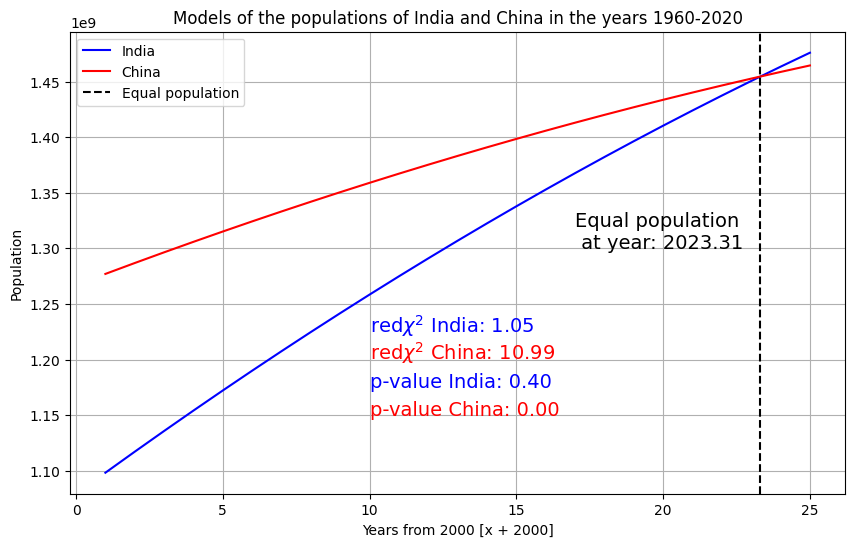

In [431]:
#plotting both fits

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, 25, 25), func_nonlinear_growth(np.linspace(1,25, 25), *mfit_india_nonlinear.values[:]), '-b', label= r"India") 
plt.plot(np.linspace(1,25, 25), func_nonlinear_growth(np.linspace(1,25, 25), *mfit_china_nonlinear.values[:]), '-r', label= r"China") 
#finding the point where the two populations are equal
equal_population = scp.optimize.root(lambda x: func_nonlinear_growth(x, *mfit_india_nonlinear.values[:]) - func_nonlinear_growth(x, *mfit_china_nonlinear.values[:]), 10).x
plt.axvline(equal_population, color='black', linestyle='--', label='Equal population')
#plt.plot(np.ones(100)*(equal_population+2010), np.linspace(0, 1.5e9, 100), '--', color='black', label='Equal population')
plt.text(17, 1.300e9, f'Equal population \n at year: {equal_population[0]+2000:.2f}', fontsize=14)
plt.text(10, 1.225e9, f'red$\chi^2$ India: {red_chi2_india:.2f}', fontsize=14, color = 'b')
plt.text(10, 1.20e9, f'red$\chi^2$ China: {red_chi2_china:.2f}', fontsize=14, color = 'r')
plt.text(10, 1.1750e9, f'p-value India: {p_val_india:.2f}', fontsize=14, color = 'b')
plt.text(10, 1.150e9, f'p-value China: {p_val_china:.2f}', fontsize=14, color = 'r')
plt.xlabel('Years from 2000 [x + 2000]')
plt.ylabel('Population')
plt.title('Models of the populations of India and China in the years 1960-2020')
plt.legend()
plt.grid()
plt.savefig('pop_predicter_nonlinear_fit.png', dpi=600)
plt.show()


##### Problem 4.2

In [359]:
#Binomial. Success or failure.
#hypothesis testing. h0
#Create a binomial distribution with 24 trials and 10 successes
n_trials = 24
n_success = 10

f = n_success/n_trials

sig_f = np.sqrt(f*(1-f)/n_trials)

print(f'The fraction of successes is: {f:.2f} +- {sig_f:.2f}')

The fraction of successes is: 0.42 +- 0.10


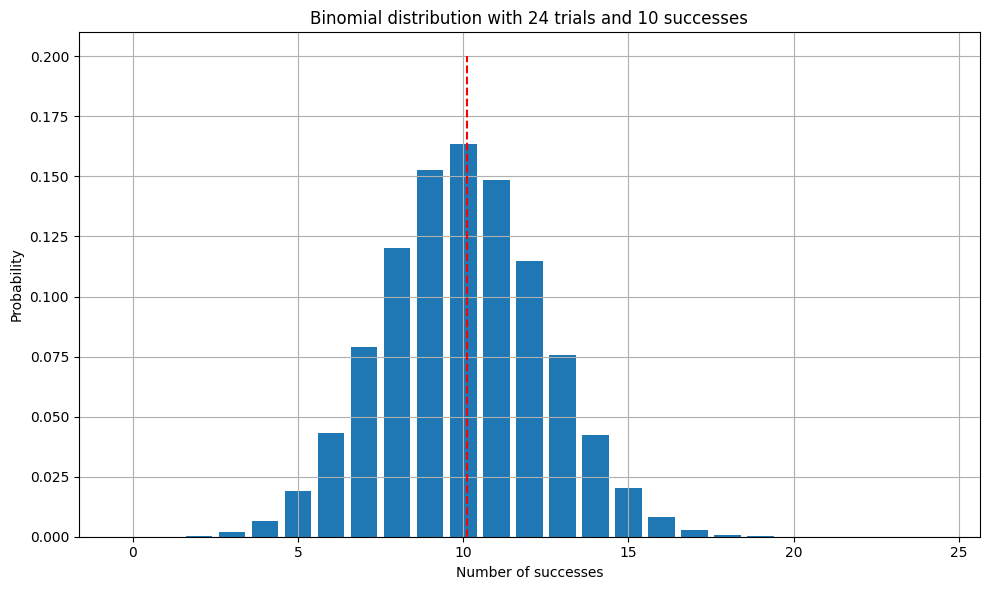

In [360]:
#plotting the binomial distribution with lines at each sigma
#In this binomial distribution 68% of the data is 16.32 trials. 
#Since sigma is 0.1, we can calculate the number of trials that are +-1 sigma away from the mean.
#This is 10.2 trials

# calculating a statistic test for the binomial distribution
#we do the fischer's exact test 
#we test the null-hypothesis that the probability of side-effects is equal in both samples

test = scp.stats.fisher_exact(table=[[5,19],[10,14]], alternative="less")


x = np.linspace(0, 24, 25)
y = scp.stats.binom.pmf(x, n_trials, f)


plt.figure(figsize=(10, 6))
plt.plot((10 + sig_f)*np.ones(25), np.linspace(0, 0.2, 25), 'r--', label='1 sigma')
plt.bar(x, y)
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Binomial distribution with 24 trials and 10 successes')
plt.grid()
plt.tight_layout()
plt.show()


In [361]:
scp.stats.fisher_exact(table=[[5,19],[10,14]], alternative="less")

SignificanceResult(statistic=np.float64(0.3684210526315789), pvalue=np.float64(0.1061922761998793))

In [362]:
print(f'The p-value for the test is: {test[1]:.2f}'), print(f'The odds ratio is: {test[0]:.2f}')


The p-value for the test is: 0.11
The odds ratio is: 0.37


(None, None)

The odds of side-effects occurring in the treatment group are 0.37 times the odds of side-effects occurring in the control group. Side-effects are less likely to occur in the treatment group compared to the control group. However, since the p-value is not statistically significant, we cannot confidently state that this difference is not due to random chance.

##### Problem 4.3

In [363]:
A = np.array([28.9, 26.4, 22.8, 27.3, 25.9])
B = np.array([22.4, 21.3, 25.1, 24.8, 22.5])

mu_A = np.mean(A)
mu_B = np.mean(B)
std_A = np.std(A, ddof=1)
std_B = np.std(B, ddof=1)
print(f'The mean of A is: {mu_A:.2f} +- {std_A:.2f} and the mean of B is: {mu_B:.2f} +- {std_B:.2f}')
#doing a t-test, because we have two small samples. We test for the null-hypothesis that 
#the means of the two samples are equal.


t_test = scp.stats.ttest_ind(B, A)
print(f'The p-value for the t-test is: {t_test[1]:.2f}')
print(f'The statistic value for the t-test is: {t_test[0]:.2f}')

The mean of A is: 26.26 +- 2.25 and the mean of B is: 23.22 +- 1.65
The p-value for the t-test is: 0.04
The statistic value for the t-test is: -2.44


The p-value is statistically significant at 0.04, with our cut-off at 0.05. We can definitely state that these two samples are not from the same mother-sample. So, there means are statistically different, and it is a reasonable claim that company A makes, when the say that their batteries' lifetime is significantly longer.   

#### Problem 5

##### Problem 5.1

In [433]:
dataframe = pd.read_csv('data_SignalDetection.csv', header=0)
index, P, R, freq, type = dataframe.values.T
dataframe.columns = ['index', 'P', 'R', 'freq', 'type']


control_sample = dataframe[0:100000]

real_sample = dataframe[100000:199999]

dataframe.T[1:3]


,0,1,2,3,4,5,6,7,8,9,...,119990,119991,119992,119993,119994,119995,119996,119997,119998,119999
P,6.41748,2.83297,5.13004,9.60038,7.17903,5.65831,6.82226,10.58751,6.54431,8.09536,...,3.92583,8.78164,3.88769,3.68012,4.41104,4.25885,6.45887,0.53238,1.94328,2.35050
R,1.35986,2.88136,11.45223,10.35148,4.45108,1.10208,4.95146,8.82819,2.73528,5.13927,...,3.82765,9.66599,4.37497,-1.21252,2.46644,-0.08775,4.62049,-2.07295,8.69095,1.20062


         index        P         R     freq  type
2          3.0  5.13004  11.45223  1.41931   1.0
24        25.0  0.53166   1.81320  1.42024   1.0
43        44.0  4.20581   9.91207  1.40330   1.0
64        65.0  6.01725  13.50109  1.39253   1.0
77        78.0  5.74805   7.26764  1.41442   1.0
...        ...      ...       ...      ...   ...
99747  99748.0  0.77049   0.97455  1.50176   1.0
99749  99750.0  6.22982   7.83977  1.46431   1.0
99871  99872.0  6.96821  13.50753  1.44317   1.0
99941  99942.0  3.04457   7.34439  1.44215   1.0
99952  99953.0  6.17520  11.75493  1.43752   1.0

[2000 rows x 5 columns]


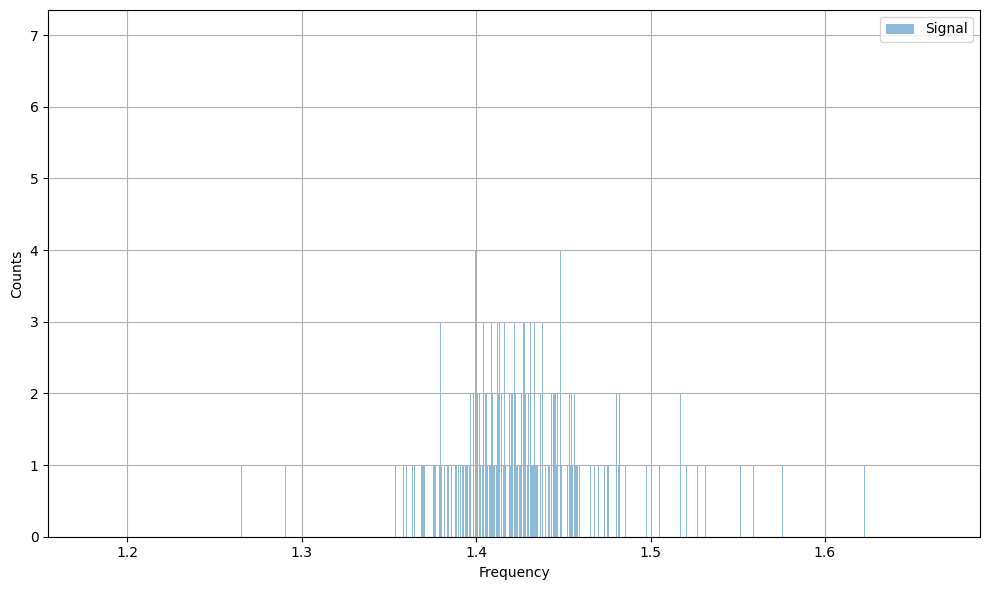

In [434]:
#datasorting

signal_data = control_sample[control_sample['type'] == 1]
noise_data = control_sample[control_sample['type'] == 0]

print(signal_data)
#plotting the data

plt.figure(figsize=(10, 6))
plt.hist(signal_data['freq'], bins = 9800, alpha=0.5, label='Signal')
plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



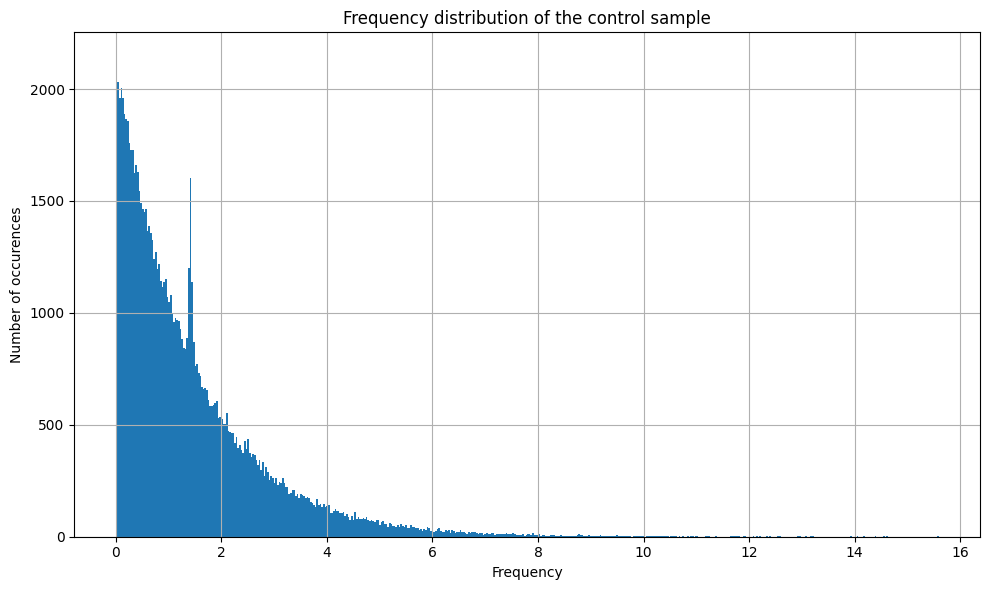

<ErrorView Nexp=319.43879848296046 tau=0.0044029069313473 Ngauss=75.8424992870282 mu=0.0013363858307458044 sigma=0.001451266688503918>


In [450]:
bin_count = 500
binwidth = np.max(freq[0:100000])/bin_count
#Plotting the control sample frequency distribution

plt.figure(figsize=(10, 6))
plt.hist(freq[0:100000], bins=bin_count)
plt.xlabel('Frequency')
plt.ylabel('Number of occurences')
plt.title('Frequency distribution of the control sample')
plt.grid()
plt.tight_layout()
plt.show()


#Plotting the signal sample frequency distribution
def gauss_pdf(x, mu, sigma, Ngauss, binwidth) :
    """Gaussian"""
    return Ngauss * binwidth * 1.0 / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2)

def exp_pdf(x, tau, binwidth, Nexp):
    """Exponential with lifetime tau"""
    return Nexp * binwidth * 1.0 / tau * np.exp(-x/tau)

def fit_pdf(x, Nexp, tau, Ngauss, mu, sigma) :
    """Exponential + Gaussian"""
    return exp_pdf(x, tau, binwidth, Nexp) + gauss_pdf(x, mu, sigma, Ngauss, binwidth)

#cutting off all data above freq = 9

#doing an exp fit to the signal sample


counts, bin_edges = np.histogram(freq[0:100000], bins=bin_count)


x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])

#Fit the data

exp_fit = cost.LeastSquares(x, y, sy, fit_pdf)
mfit = Minuit(exp_fit, Nexp = 100000, tau = 1.8, mu = 1.42, sigma = 0.01, Ngauss = 1000)
mfit.migrad()

#ext

print(mfit.errors)


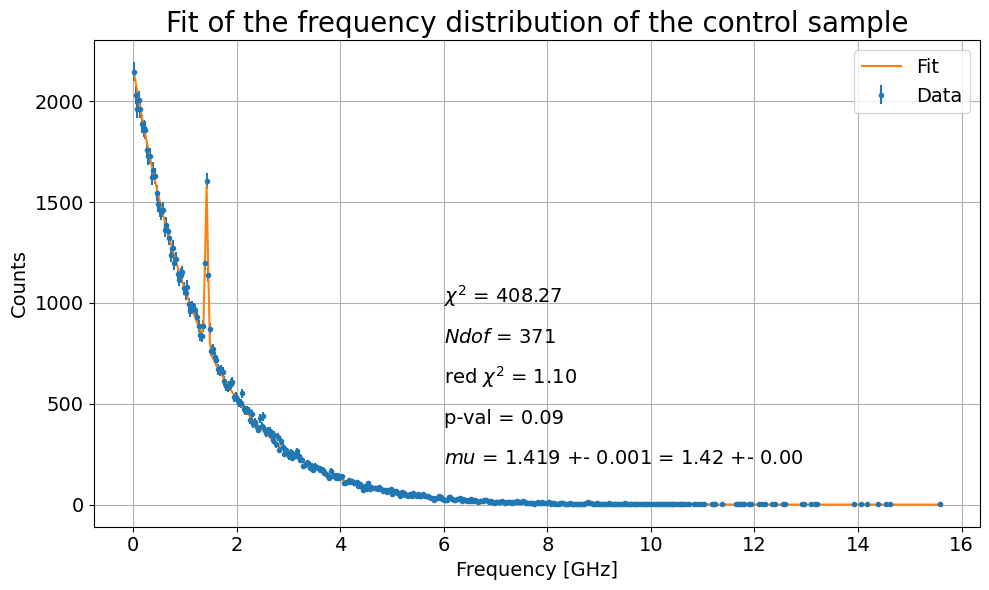

In [452]:
#plotting the data and the fit
Ndof = len(x)-len(mfit.values)
p_value = scp.stats.chi2.sf(mfit.fval, Ndof)

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=sy, fmt='.', label='Data')
plt.plot(x, fit_pdf(x, *mfit.values), label='Fit')
plt.text(6, 1000, r'$\chi^2$ = {:.2f}'.format(mfit.fval), fontsize=14);
plt.text(6, 800, r'$Ndof$ = {}'.format(Ndof), fontsize=14);
plt.text(6, 600, r'red $\chi^2$ = {:.2f}'.format(mfit.fval/Ndof), fontsize=14);
plt.text(6, 400, r'p-val = {:.2f}'.format(p_value), fontsize = 14);
plt.text(6, 200, r'$mu$ = {:.3f} +- {:.3f} = {:.2f} +- {:.2f}'.format(mfit.values[3], mfit.errors[3], mfit.values[3], mfit.errors[3]), fontsize=14)
plt.xlabel('Frequency [GHz]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Fit of the frequency distribution of the control sample', fontsize=20)   
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('fit_5.1.png', dpi=600)
plt.show()


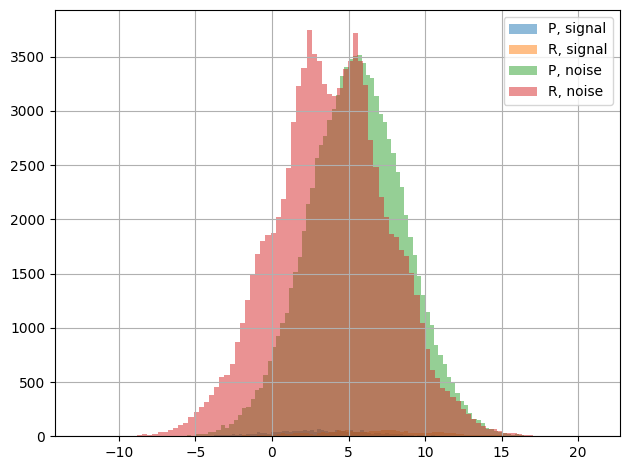

fisher sig: 2        2.025643
24       0.451132
43       1.862141
64       2.402255
77       0.126874
           ...   
99747    0.017149
99749    0.123258
99871    1.962693
99941    1.413110
99952    1.656384
Length: 2000, dtype: float64


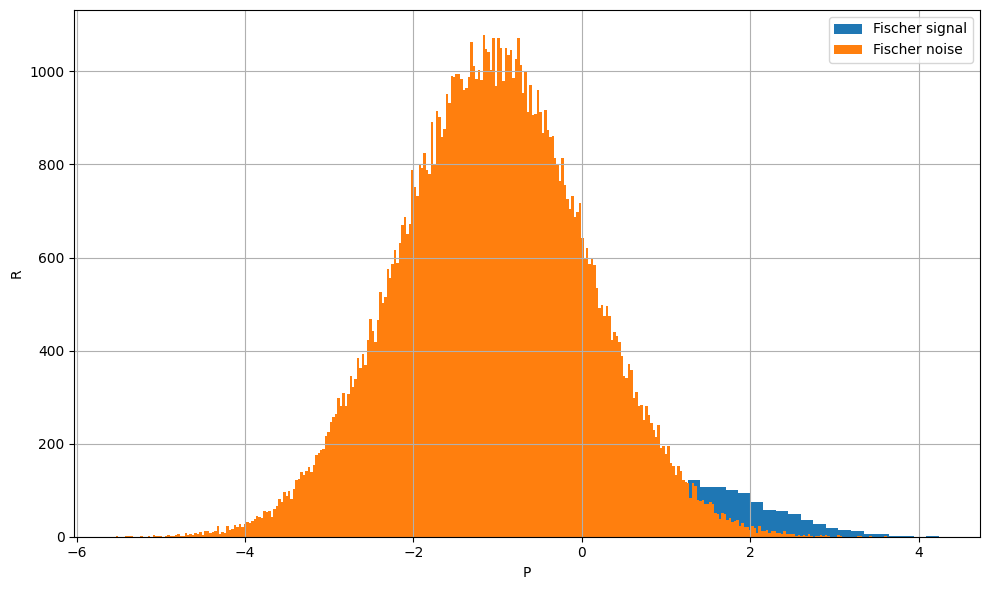

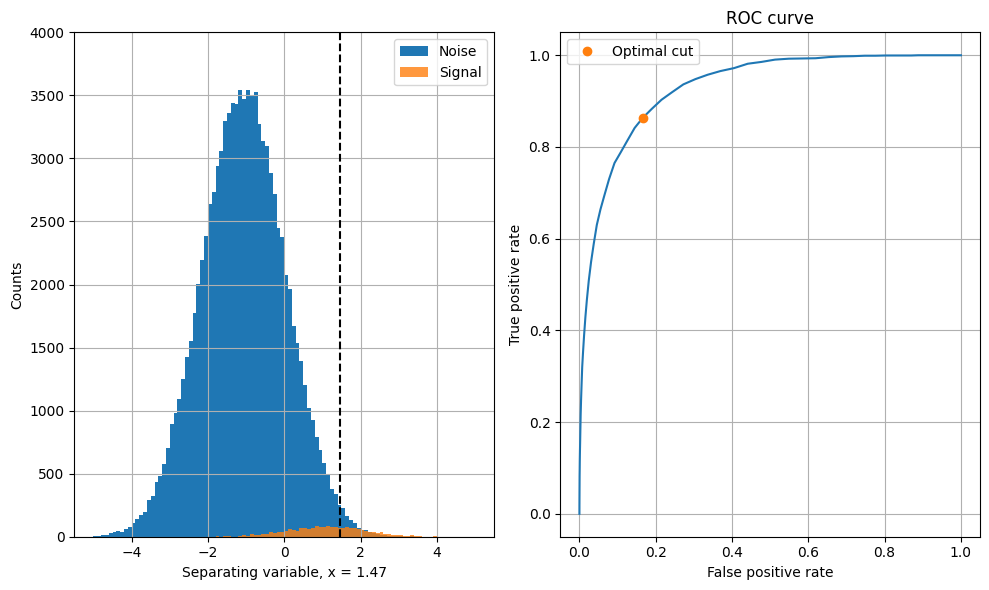

In [459]:
def calc_ROC(hist1, hist2) :

    # First we extract the entries (y values) and the edges of the histograms:
    # Note how the "_" is simply used for the rest of what e.g. "hist1" returns (not really of our interest)
    y_sig, x_sig_edges, _ = hist1 
    y_bkg, x_bkg_edges, _ = hist2
    
    # Check that the two histograms have the same x edges:
    if np.array_equal(x_sig_edges, x_bkg_edges) :
        
        # Extract the center positions (x values) of the bins (both signal or background works - equal binning)
        x_centers = 0.5*(x_sig_edges[1:] + x_sig_edges[:-1])
        
        # Calculate the integral (sum) of the signal and background:
        integral_sig = y_sig.sum()
        integral_bkg = y_bkg.sum()
    
        # Initialize empty arrays for the True Positive Rate (TPR) and the False Positive Rate (FPR):
        TPR = np.zeros_like(y_sig) # True positive rate (sensitivity)
        FPR = np.zeros_like(y_sig) # False positive rate ()
        
        # Loop over all bins (x_centers) of the histograms and calculate TN, FP, FN, TP, FPR, and TPR for each bin:
        for i, x in enumerate(x_centers): 
            
            # The cut mask
            cut = (x_centers < x)
            
            # True positive
            TP = np.sum(y_sig[~cut]) / integral_sig    # True positives
            FN = np.sum(y_sig[cut]) / integral_sig     # False negatives
            TPR[i] = TP / (TP + FN)                    # True positive rate
            
            # True negative
            TN = np.sum(y_bkg[cut]) / integral_bkg      # True negatives (background)
            FP = np.sum(y_bkg[~cut]) / integral_bkg     # False positives
            FPR[i] = FP / (FP + TN)                     # False positive rate            
            
        return FPR, TPR
    
    else:
        AssertionError("Signal and Background histograms have different bins and/or ranges")
#quantifying how well we can separate background and data using P and R

#doing a fischers discriminant test to measure the separation of P and R

plt.hist(signal_data['P'], bins=100, alpha=0.5, label='P, signal')
plt.hist(signal_data['R'], bins=100, alpha=0.5, label='R, signal')
plt.hist(noise_data['P'], bins=100, alpha=0.5, label='P, noise')
plt.hist(noise_data['R'], bins=100, alpha=0.5, label='R, noise')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#doing the fischers discriminant test
signal_control = signal_data.T[1:3]
noise_control = noise_data.T[1:3]

mean_1 = np.mean(signal_control, axis = 1)
mean_2 = np.mean(noise_control, axis = 1)


cov_1 = np.cov(signal_control)
cov_2 = np.cov(noise_control)



cov_tot = cov_1 + cov_2



cov_tot_inv = np.linalg.inv(cov_tot)

wf = np.matmul(cov_tot_inv, (mean_1 - mean_2))


fisher_signal = signal_control.T.dot(wf)
fisher_noise = noise_control.T.dot(wf)
print('fisher sig:',fisher_signal)
N_bins = 300

signal_hist, signal_bins = np.histogram(fisher_signal, bins=N_bins)

noise_hist, noise_bins = np.histogram(fisher_noise, bins=N_bins)


#plotting the parameter space

plt.figure(figsize=(10, 6))
plt.hist(fisher_signal, bins=int(np.sqrt(len(fisher_signal))), label='Fischer signal')
plt.hist(fisher_noise, bins=int(np.sqrt(len(fisher_noise))),label='Fischer noise')
plt.xlabel('P')
plt.ylabel('R')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



#plotting the ROC curve
Nbins = 100
hist_range = [-5, 5]

def sep_calc(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    x_std = np.std(x, ddof = 1)
    y_std = np.std(y, ddof = 1)
    sep = np.abs((x_mean - y_mean)) / np.sqrt(x_std**2 + y_std**2)
    return sep

sep = sep_calc(fisher_signal, fisher_noise)

fig, ax = plt.subplots(1,2,figsize=(10, 6))


noise_hist = ax[0].hist(fisher_noise, bins=Nbins, range=hist_range, histtype='stepfilled', label='Noise', alpha=1);
signal_hist = ax[0].hist(fisher_signal, bins=Nbins, range=hist_range, histtype='stepfilled', label='Signal', alpha=0.8);
ax[0].legend()
ax[0].set_ylim(0, 4000)
ax[0].set_xlabel(f'Separating variable, x = {sep:.2f}')
ax[0].set_ylabel('Counts')

ax[0].grid()

FPR, TPR = calc_ROC(signal_hist, noise_hist)
TPR = np.sort(TPR)
FPR = np.sort(FPR)

optimal_idx = np.argmax(TPR - FPR)

ax[0].axvline(sep, label='Separation', linestyle='--', color='black')

ax[1].plot(FPR, TPR)
ax[1].plot(FPR[optimal_idx], TPR[optimal_idx], 'o', label = 'Optimal cut')
ax[1].legend()
ax[1].set_xlabel('False positive rate')
ax[1].set_ylabel('True positive rate')
ax[1].set_title('ROC curve')
ax[1].grid()
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=600)
plt.show()


##### SELECTING ENTRIES AND GETTING A GOOD H-PEAK fit

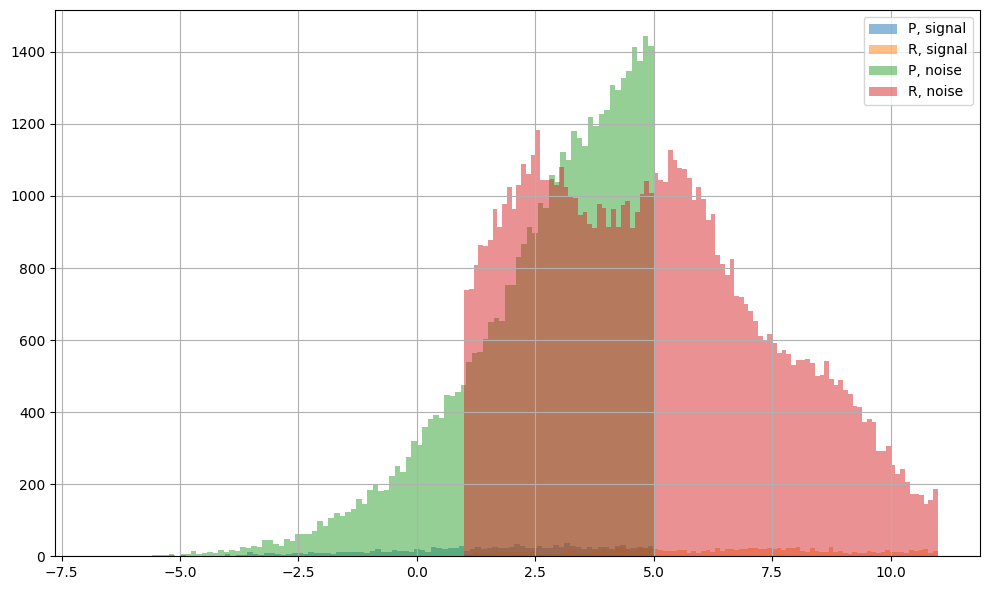

In [454]:
#selecting entries with a certain value of P and R

#having measured the fischer discriminant, we can now select the entries with a certain value of P and R

mask_P = (P > -7) & (P < 5)
mask_R = (R > 1) & (R < 11)

masked_P = P[mask_P]
masked_R = R[mask_R]

masked_P_sig = P[mask_P & (type == 1)]
masked_R_sig = R[mask_R & (type == 1)]
masked_P_noise = P[mask_P & (type == 0)]
masked_R_noise = R[mask_R & (type == 0)]

#plotting the masked data

plt.figure(figsize=(10, 6))
plt.hist(masked_P_sig, bins=100, alpha=0.5, label='P, signal')
plt.hist(masked_R_sig, bins=100, alpha=0.5, label='R, signal')
plt.hist(masked_P_noise, bins=100, alpha=0.5, label='P, noise')
plt.hist(masked_R_noise, bins=100, alpha=0.5, label='R, noise')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [455]:
#using the ROC curve to find the optimal cut


mask_P = (P > -7) & (P < 5)
mask_R = (R > 0) & (R < 10)

#selecting entries based on optimal cut
freq_selected = freq[mask_P & mask_R]

#doing a fit 
counts, bin_edges = np.histogram(freq_selected, bins=bin_count)


x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])

#Fit the data

optimal_exp_fit = cost.LeastSquares(x, y, sy, fit_pdf)
mfit = Minuit(optimal_exp_fit, Nexp = 100000, tau = 1.8, mu = 1.42, sigma = 0.01, Ngauss = 1000)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 342.1 (χ²/ndof = 1.0)      │              Nfcn = 358              │
│ EDM = 8.35e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Nexp   │  32.25e3  │  0.18e3   │            │            │         │         │       │
│ 1 │ tau    │   1.410   │   0.008   │            │            │         │         │       │
│ 2 │ Ngauss │  1.05e3   │  0.05e3   │            │            │         │         │       │
│ 3 │ mu     │  1.4190   │  0.0015   │            │            │         │         │       │
│ 4 │ sigma  │  0.0285   │  0.0015   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────┐
│        │        Nexp         tau      Ngauss          mu       sigma │
├────────┼─────────────────────────────────────────────────────────────┤
│   Nexp │    3.16e+04    11.56e-3      -1.3e3  -3.1658e-3 -31.4370e-3 │
│    tau │    11.56e-3     5.8e-05    -1.01e-3     -0.1e-6     -0.1e-6 │
│ Ngauss │      -1.3e3    -1.01e-3     2.3e+03   2.9878e-3  31.1029e-3 │
│     mu │  -3.1658e-3     -0.1e-6   2.9878e-3     2.2e-06      0.3e-6 │
│  sigma │ -31.4370e-3     -0.1e-6  31.1029e-3      0.3e-6     2.4e-06 │
└────────┴─────────────────────────────────────────────────────────────┘

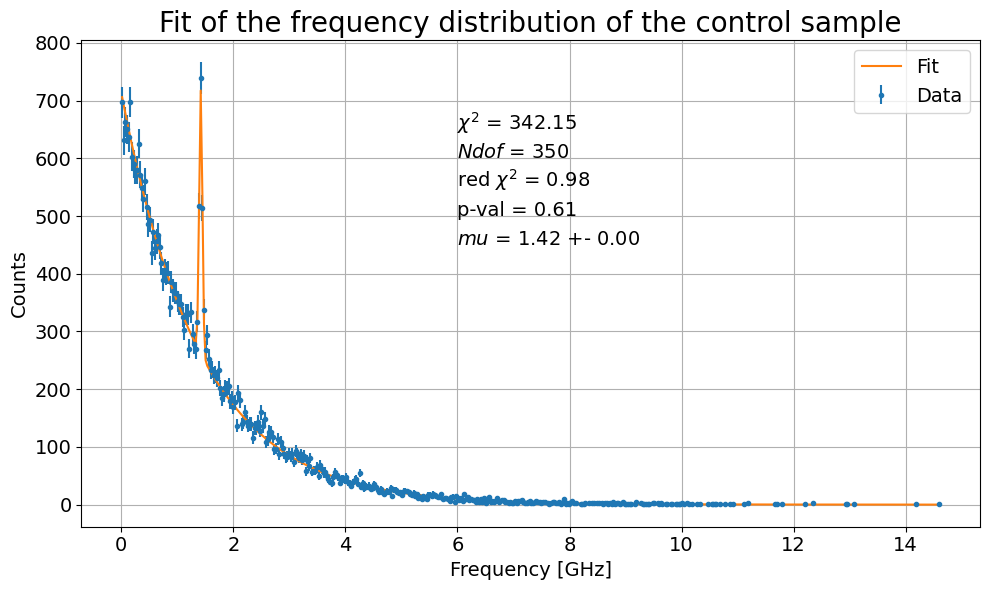

In [458]:
#plotting data andf fit

Ndof = len(x)-len(mfit.values)
p_value = scp.stats.chi2.sf(mfit.fval, Ndof)

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=sy, fmt='.', label='Data')
plt.plot(x, fit_pdf(x, *mfit.values), label='Fit')
plt.text(6, 650, r'$\chi^2$ = {:.2f}'.format(mfit.fval), fontsize=14);
plt.text(6, 600, r'$Ndof$ = {}'.format(Ndof), fontsize=14);
plt.text(6, 550, r'red $\chi^2$ = {:.2f}'.format(mfit.fval/Ndof), fontsize=14);
plt.text(6, 500, r'p-val = {:.2f}'.format(p_value), fontsize = 14);
plt.text(6, 450, r'$mu$ = {:.2f} +- {:.2f}'.format(mfit.values[3], mfit.errors[3]), fontsize=14)
plt.xlabel('Frequency [GHz]', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Fit of the frequency distribution of the control sample', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('selection_fit_5.1.png', dpi=600)
plt.show()


In [457]:
#plotting the real data


SyntaxError: invalid syntax (4108977576.py, line 4)

In [ ]:
#The real data now

#fitting the real data

counts, bin_edges = np.histogram(real_sample, bins=100)


x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])

#Fit the data

real_exp_fit = cost.LeastSquares(x, y, sy, fit_pdf)
mfit = Minuit(real_exp_fit, Nexp = 1000, tau = 1.8, mu = 1.42, sigma = 0.01, Ngauss = 1000)
mfit.migrad()
#fitting the real sample




┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1e+05 (χ²/ndof = 7692.3)   │             Nfcn = 1448              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Nexp   │    1e3    │    nan    │            │            │         │         │       │
│ 1 │ tau    │    1.8    │    nan    │            │            │         │         │       │
│ 2 │ Ngauss │    1e3    │    nan    │            │            │         │         │       │
│ 3 │ mu     │   1.42    │    nan    │            │            │         │         │       │
│ 4 │ sigma  │   1e-2    │    nan    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────────────┐
│        │   Nexp    tau Ngauss     mu  sigma │
├────────┼────────────────────────────────────┤
│   Nexp │    nan    nan    nan    nan    nan │
│    tau │    nan    nan    nan    nan    nan │
│ Ngauss │    nan    nan    nan    nan    nan │
│     mu │    nan    nan    nan    nan    nan │
│  sigma │    nan    nan    nan    nan    nan │
└────────┴────────────────────────────────────┘